In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_settings_v3 import *

from agents.utils.plotting_nahuel import plot_reward_per_episode, plot_steps_per_episode, plot_steps_per_episode_smooth, draw_value_matrix


random_state = np.random.RandomState(42)

In [2]:
def choose_action(state):
    """
    Chooses an action according to the learning previously performed 
    using an epsilon-greedy exploration policy
    """
    q_values = [q.get((state, a), 0.0) for a in actions]
    max_q = max(q_values)

    if random_state.uniform() < epsilon:
        return random_state.choice(actions)  # a random action is selected

    count = q_values.count(max_q)

    # In case there're several state-action max values
    # we select a random one among them
    if count > 1:
        best = [i for i in range(len(actions)) if q_values[i] == max_q]
        i = random_state.choice(best)
    else:
        i = q_values.index(max_q)

    return actions[i]

### **Elijo el environment "The Cliff"**

In [3]:
env = gym.make("CliffWalking-v0")

### **SARSA**

In [4]:
def learn_SARSA(state, action, reward, next_state, next_action):
    """
    Performs a SARSA update for a given state transition
    """    
    # TODO - your code goes here    
    
    q_next = q.get((next_state, next_action), 0.0)
    q[(state, action)] += alpha*(reward + gamma*q_next - q[(state, action)]) 
        
    pass

In [5]:
def run_SARSA():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        #action = random_state.choice(actions)
        action = choose_action(state)
        
        while not done:

            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)
            
            #next_action = random_state.choice(actions)
            next_action = choose_action(next_state)

            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learn_SARSA(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learn_SARSA(state, action, reward, next_state, next_action)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

### **Determino los parámetros**

In [6]:
alpha = 0.5
gamma = 1
epsilon = 0.1

episodes_to_run = 500

q = {}
states = range(env.observation_space.n)
actions = range(env.action_space.n)
for s in states:
    for a in actions:
        q[(s, a)] = 0.0

In [7]:
avg_steps_per_eps, timesteps_eps, reward_eps = run_SARSA()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


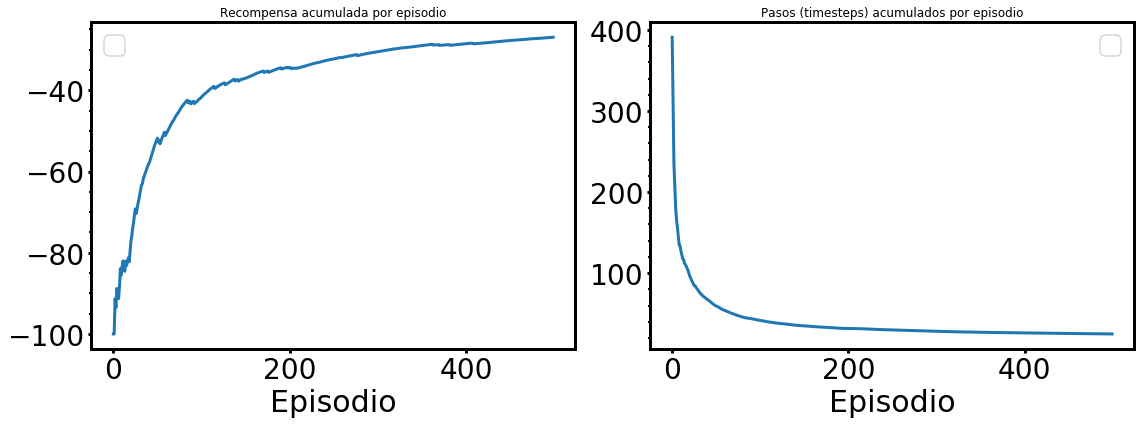

In [8]:
## Plot reward
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes:
    ax.set_xlabel('Episodio')

ax = axes[0]
plot_reward_per_episode(reward_eps, ax)
ax.legend()

ax = axes[1]
plot_steps_per_episode_smooth(timesteps_eps, ax)
ax.legend()

plt.tight_layout()
plt.show()

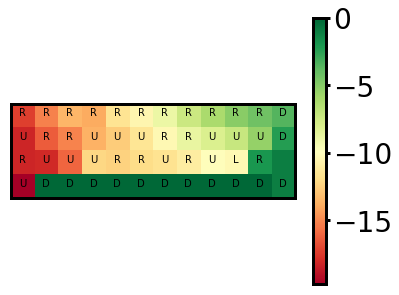


 Matriz de mejor acción-valor (en números): 

 [[-17.23954428 -15.14316652 -13.47940719 -13.86734791 -11.50591433
  -10.42824021  -8.92910114  -7.36906975  -6.09772006  -5.02260286
   -4.246717    -3.48743802]
 [-18.17688817 -16.29163152 -15.09887514 -13.57191616 -12.57200446
  -11.46204211 -10.28051994  -8.75636874  -8.02140089  -7.17268501
   -5.41325753  -2.24362335]
 [-18.16818774 -17.96726471 -16.02741607 -12.12753358 -12.36502775
  -11.94064567 -11.56233996 -10.96253903  -9.96154144 -10.28531687
   -2.00258599  -1.        ]
 [-19.72790699   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.          -1.        ]]


In [9]:
draw_value_matrix(q)

### **Q-learning**

In [10]:
def learn_Q(state, action, reward, next_state):
    """
    Performs a Q-Learning update for a given state transition
    """

    max_q_next = max([q.get((next_state, a), 0.0) for a in actions])    
    q[(state, action)] += alpha*(reward + gamma*max_q_next - q[(state, action)]) 
        
    pass

def run_Q():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        #action = random_state.choice(actions)
        action = choose_action(state)
        
        while not done:

            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)
            
            #next_action = random_state.choice(actions)
            next_action = choose_action(next_state)
            
            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learn_Q(state, action, reward, next_state)
                state = next_state
                action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learn_Q(state, action, reward, next_state)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

### **Defino los parámetros**

In [11]:
alpha = 0.5
gamma = 1
epsilon = 0.1

episodes_to_run = 500

q = {}
states = range(env.observation_space.n)
actions = range(env.action_space.n)
for s in states:
    for a in actions:
        q[(s, a)] = 0.0

In [12]:
avg_steps_per_episode, timesteps_eps, reward_eps = run_Q()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


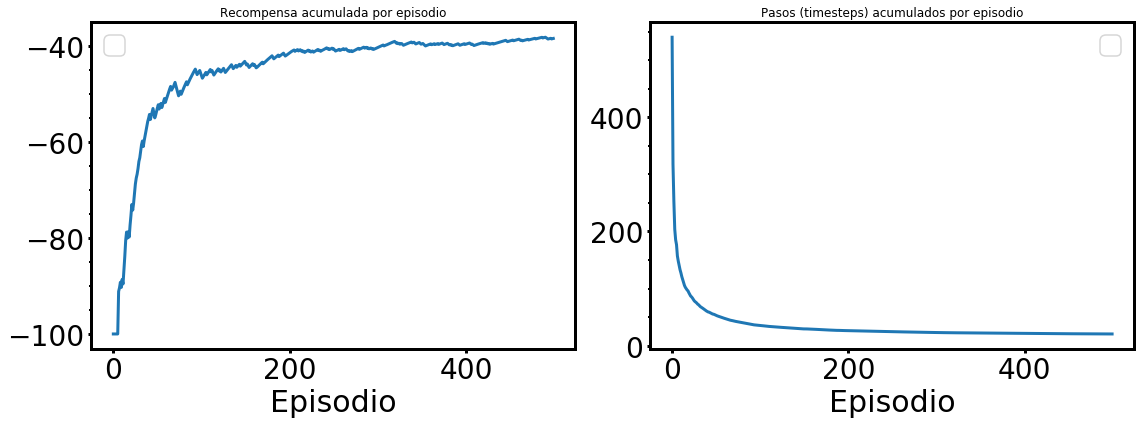

In [13]:
## Plot reward
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes:
    ax.set_xlabel('Episodio')

ax = axes[0]
plot_reward_per_episode(reward_eps, ax)
ax.legend()

ax = axes[1]
plot_steps_per_episode_smooth(timesteps_eps, ax)
ax.legend()

plt.tight_layout()
plt.show()

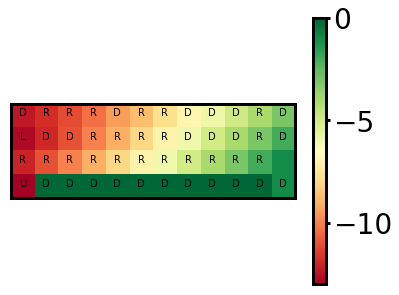


 Matriz de mejor acción-valor (en números): 

 [[-12.29968609 -11.76565937 -11.1085597  -10.33905953  -9.44382289
   -8.6543476   -7.75634763  -6.85631271  -5.90322719  -4.96617563
   -3.98241282  -2.9987419 ]
 [-12.71416971 -11.93150396 -10.9866554   -9.99620238  -8.99913097
   -7.99981954  -6.99989822  -5.99996525  -4.99999698  -3.99999896
   -2.99999994  -2.        ]
 [-12.         -11.         -10.          -9.          -8.
   -7.          -6.          -5.          -4.          -3.
   -2.          -1.        ]
 [-13.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.          -1.        ]]


In [16]:
draw_value_matrix(q)

### **Comparación entre los modelos**

In [14]:


q = {}
states = range(env.observation_space.n)
actions = range(env.action_space.n)
for s in states:
    for a in actions:
        q[(s, a)] = 0.0
        
avg_steps_per_episode_SARSA, timesteps_eps_SARSA, reward_eps_SARSA = run_SARSA()

q = {}
states = range(env.observation_space.n)
actions = range(env.action_space.n)
for s in states:
    for a in actions:
        q[(s, a)] = 0.0
avg_steps_per_episode_Q, timesteps_eps_Q, reward_eps_Q = run_Q()

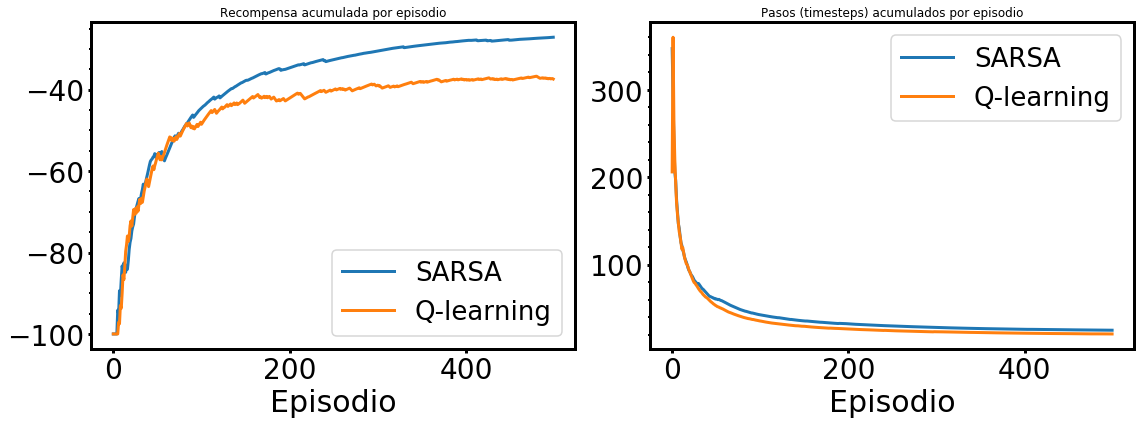

In [15]:
## Plot reward
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes:
    ax.set_xlabel('Episodio')

ax = axes[0]
plot_reward_per_episode(reward_eps_SARSA, ax, label='SARSA')
plot_reward_per_episode(reward_eps_Q, ax, label='Q-learning')
ax.legend()

ax = axes[1]
plot_steps_per_episode_smooth(timesteps_eps_SARSA, ax, label='SARSA')
plot_steps_per_episode_smooth(timesteps_eps_Q, ax, label='Q-learning')
ax.legend()

plt.tight_layout()
plt.show()

En base a los gráficos anteriores, podemos ver que el modelo SARSA aprende una estrategia "segura", que consiste en alejarse lo más posible del precipicio, moviéndose mayoritariamente por el sector superior del mapa. Esto hace que la recompensa promedio por episodio tienda a ser alta (rara vez cae al precipicio), a expensas de recorrer un mayor número de pasos.

En cambio, Q-learning optimiza el número de pasos, esto es, tiende a moverse por la parte inferior del mapa. Esto hace que, con mayor probabilidad, el agente caiga al precipicio, obteniendose una menor recompensa promedio por episodio.

### **Variación de parámetros**

#### Sensibilidad respecto a $\gamma$

In [31]:
alpha = 0.5
epsilon = 0.1

episodes_to_run = 500

avg_steps_per_episode = {
    'SARSA': {},
    'Q': {}
}
timesteps_eps = {
    'SARSA': {},
    'Q': {}
}
reward_eps = {
    'SARSA': {},
    'Q': {}
}

gamma_values = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

for gamma in gamma_values:

    q = {}
    states = range(env.observation_space.n)
    actions = range(env.action_space.n)
    for s in states:
        for a in actions:
            q[(s, a)] = 0.0

    avg_steps_per_episode['SARSA'][gamma], timesteps_eps['SARSA'][gamma], reward_eps['SARSA'][gamma] = run_SARSA()

    q = {}
    states = range(env.observation_space.n)
    actions = range(env.action_space.n)
    for s in states:
        for a in actions:
            q[(s, a)] = 0.0
    avg_steps_per_episode['Q'][gamma], timesteps_eps['Q'][gamma], reward_eps['Q'][gamma] = run_Q()

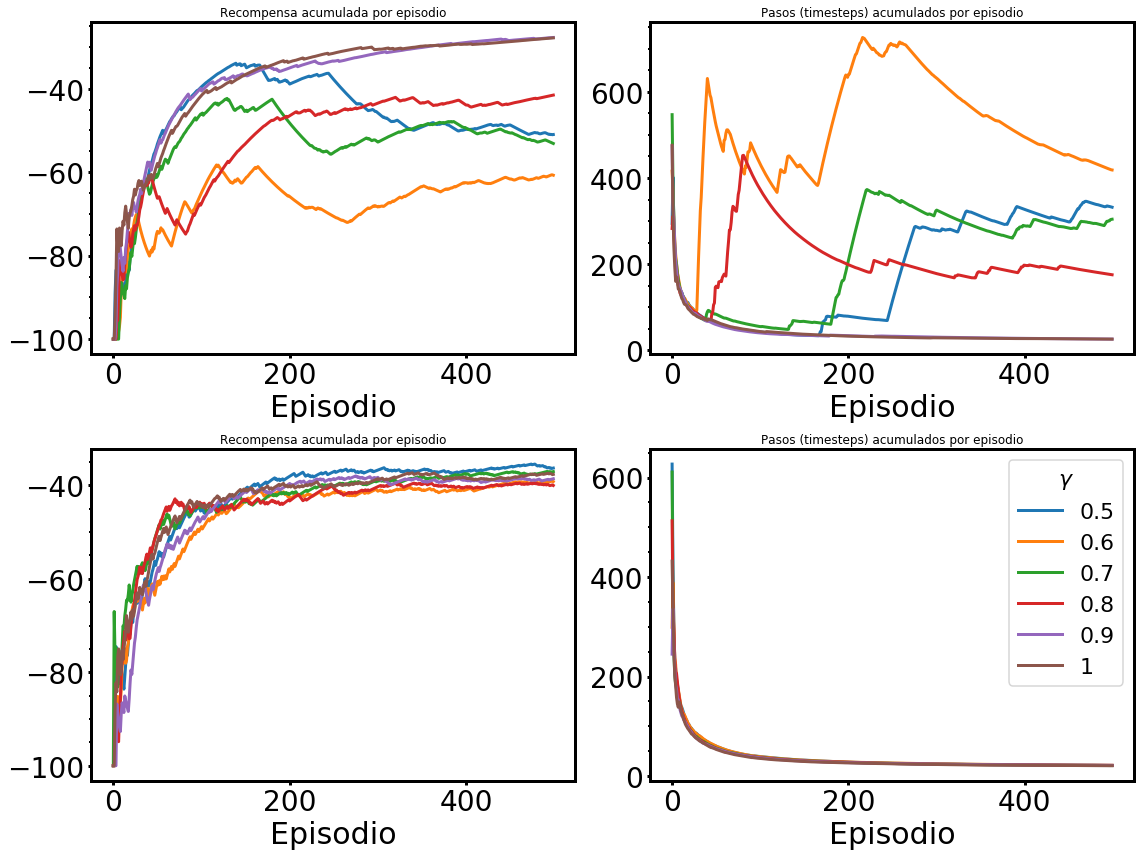

In [32]:
## Plot reward
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlabel('Episodio')

ax = axes[0][0]
for gamma in gamma_values:
    plot_reward_per_episode(reward_eps['SARSA'][gamma], ax)
#ax.legend()

ax = axes[0][1]
for gamma in gamma_values:
    plot_steps_per_episode_smooth(timesteps_eps['SARSA'][gamma], ax)
#ax.legend()

ax = axes[1][0]
for gamma in gamma_values:
    plot_reward_per_episode(reward_eps['Q'][gamma], ax)
#ax.legend()

ax = axes[1][1]
for gamma in gamma_values:
    plot_steps_per_episode_smooth(timesteps_eps['Q'][gamma], ax, label=gamma)
legend = ax.legend(fontsize=22)
legend.set_title(r'$\gamma$', prop={'size': 22})

plt.tight_layout()
plt.show()

Podemos ver que SARSA es particularmente sensible a la elección de $\gamma$, y que sólo muestra convergencia para valores relativamente altos. Por otro lado, este parámetro no parece afectar de manera muy significativa a Q-learning.

In [42]:
gamma = 1
epsilon = 0.1

episodes_to_run = 500

avg_steps_per_episode = {
    'SARSA': {},
    'Q': {}
}
timesteps_eps = {
    'SARSA': {},
    'Q': {}
}
reward_eps = {
    'SARSA': {},
    'Q': {}
}

alpha_values = [0.25, 0.5, 0.75, 0.9, 1]

for alpha in alpha_values:

    q = {}
    states = range(env.observation_space.n)
    actions = range(env.action_space.n)
    for s in states:
        for a in actions:
            q[(s, a)] = 0.0

    avg_steps_per_episode['SARSA'][alpha], timesteps_eps['SARSA'][alpha], reward_eps['SARSA'][alpha] = run_SARSA()

    q = {}
    states = range(env.observation_space.n)
    actions = range(env.action_space.n)
    for s in states:
        for a in actions:
            q[(s, a)] = 0.0
    avg_steps_per_episode['Q'][alpha], timesteps_eps['Q'][alpha], reward_eps['Q'][alpha] = run_Q()

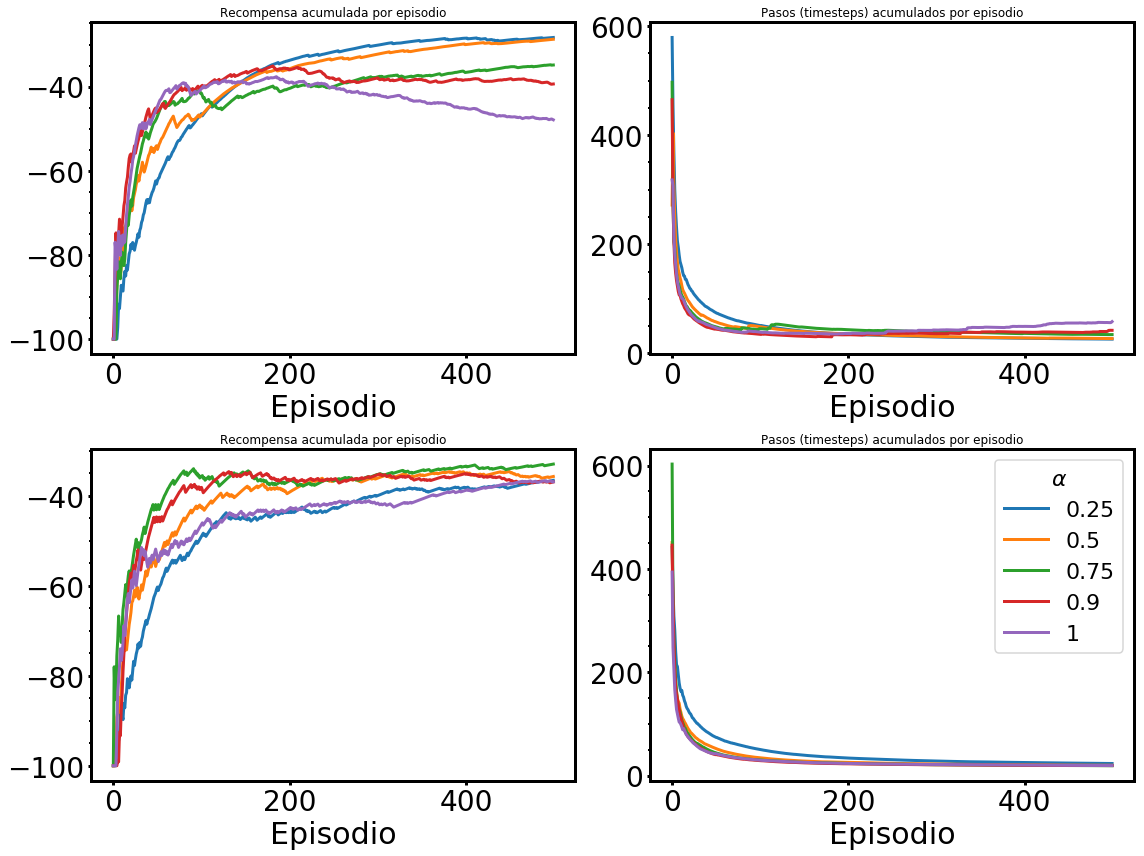

In [43]:
## Plot reward
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlabel('Episodio')

ax = axes[0][0]
for alpha in alpha_values:
    plot_reward_per_episode(reward_eps['SARSA'][alpha], ax)
#ax.legend()

ax = axes[0][1]
for alpha in alpha_values:
    plot_steps_per_episode_smooth(timesteps_eps['SARSA'][alpha], ax)
#ax.legend()

ax = axes[1][0]
for alpha in alpha_values:
    plot_reward_per_episode(reward_eps['Q'][alpha], ax)
#ax.legend()

ax = axes[1][1]
for alpha in alpha_values:
    plot_steps_per_episode_smooth(timesteps_eps['Q'][alpha], ax, label=alpha)
legend = ax.legend(fontsize=22)
legend.set_title(r'$\alpha$', prop={'size': 22})

plt.tight_layout()
plt.show()

En el modelo SARSA, el parámetro $\alpha$ afecta tanto la velocidad de convergencia como el comportamiento a largo plazo. Valores altos de este parámetro generan un convergencia rápida, pero con recompenzas a largo plazo menores. Valores pequeños relentizan la convergencia, pero dan un mejor comportamiento a largo plazo.

En cuanto a Q-learning, resulta conveniente utilizar valores intermedios de $\alpha$, que dan lugar a una rápida convergencia y a un buen valor de saturación de recompensa promedio.

In [66]:
gamma = 1
alpha = 0.5
episodes_to_run = 500

avg_steps_per_episode = {
    'SARSA': {},
    'Q': {}
}
timesteps_eps = {
    'SARSA': {},
    'Q': {}
}
reward_eps = {
    'SARSA': {},
    'Q': {}
}

epsilon_values = [0, 0.001, 0.01, 0.1]

for epsilon in epsilon_values:

    q = {}
    states = range(env.observation_space.n)
    actions = range(env.action_space.n)
    for s in states:
        for a in actions:
            q[(s, a)] = 0.0

    avg_steps_per_episode['SARSA'][epsilon], timesteps_eps['SARSA'][epsilon], reward_eps['SARSA'][epsilon] = run_SARSA()

    q = {}
    states = range(env.observation_space.n)
    actions = range(env.action_space.n)
    for s in states:
        for a in actions:
            q[(s, a)] = 0.0
    avg_steps_per_episode['Q'][epsilon], timesteps_eps['Q'][epsilon], reward_eps['Q'][epsilon] = run_Q()

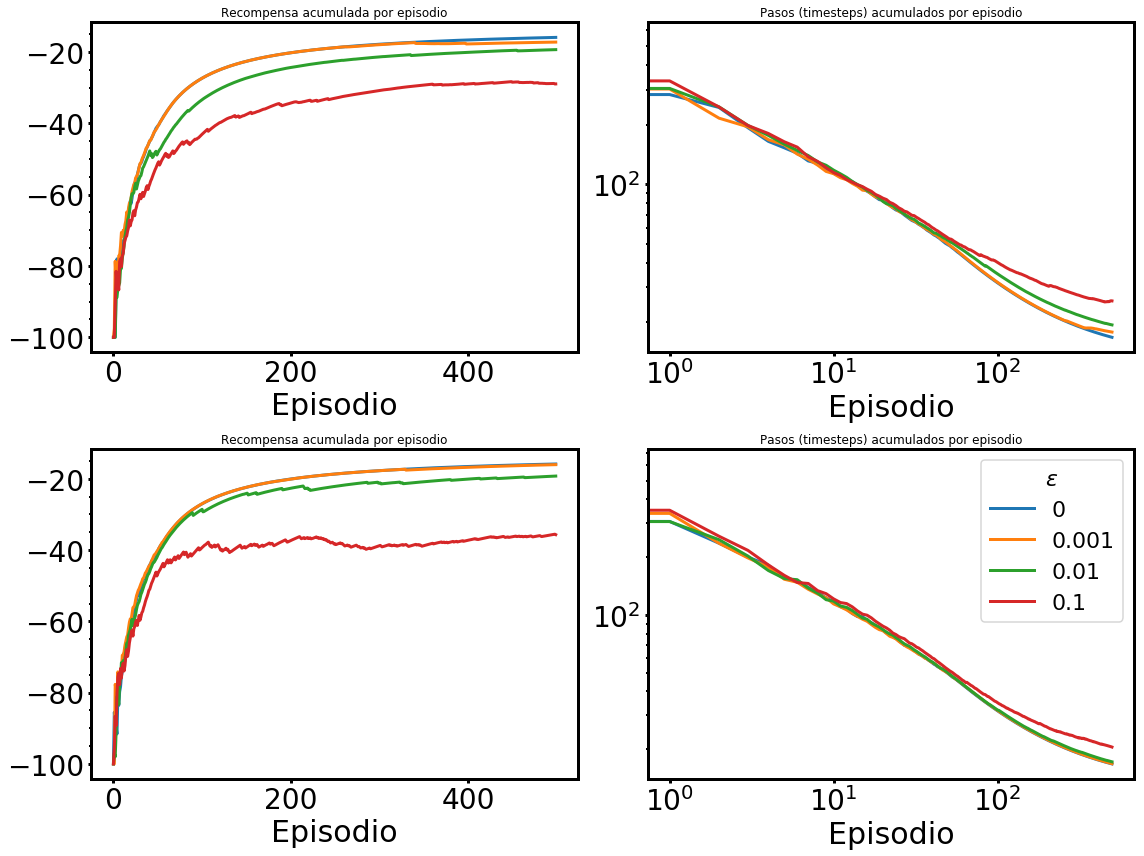

In [67]:
## Plot reward
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlabel('Episodio')

ax = axes[0][0]
for epsilon in epsilon_values:
    plot_reward_per_episode(reward_eps['SARSA'][epsilon], ax)
#ax.legend()

ax = axes[0][1]
ax.set_xscale('log')
ax.set_yscale('log')
for epsilon in epsilon_values:
    plot_steps_per_episode_smooth(timesteps_eps['SARSA'][epsilon], ax)
#ax.legend()

ax = axes[1][0]
for epsilon in epsilon_values:
    plot_reward_per_episode(reward_eps['Q'][epsilon], ax)
#ax.legend()

ax = axes[1][1]
ax.set_xscale('log')
ax.set_yscale('log')
for epsilon in epsilon_values:
    plot_steps_per_episode_smooth(timesteps_eps['Q'][epsilon], ax, label=r'${{{}}}$'.format(epsilon))
legend = ax.legend(fontsize=22)
legend.set_title(r'$\epsilon$', prop={'size': 22})

plt.tight_layout()
plt.show()

En los dos modelos conviene utilizar valores pequeños de $\epsilon$, dado que mejoran tanto la convergencia como el comportamiento a largo plazo. Incluso, $\epsilon = 0$ se comporta tan bien como $\epsilon = 0.001$.